# Forest Fire Data

In [2]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import random

In [173]:
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import interp1d
from sklearn import datasets,linear_model, neighbors
from sklearn.metrics import mean_squared_error, r2_score


# Read Data

In [80]:
fl = pd.read_csv('forestfires.csv')

# Forest Fire Data

#### (b) Exploring the data:                                                                                                                                                                                       i. How many rows are in this data set? How many columns? What do the rows and columns represent?
Answer: There are 518 rows and 13 columns in the dataset.
The first 12 columns indicate the preictors and the 13 column indicates the response. The rows represent the different values of the reponse and predictor values.

####  (b) ii. Explain why the transformation Y1 = ln(1 + Y ), where Y is the response variable is useful for this dataset. In the following, use Y1 as the new response variable.
As we observe that a lot of values of the response area are 0 initially and suddenly increasing to very high values- skewed data. In order to control this the tranformation Y1=ln(1+Y) is useful in the dataset. 1+Y: is used to have a value not equal to zero.

#### (b) iii. Make pairwise scatterplots of the predictors (columns) in this data set with the dependent variable. Describe your findings.


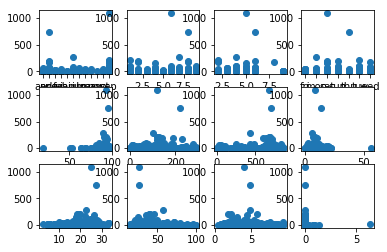

In [104]:
f=plt.figure()
g1 = f.add_subplot(3,4,1)
g1.scatter(fl["month"] ,fl["area"])
g2 = f.add_subplot(3,4,2)
g2.scatter(fl["X"] ,fl["area"])
g3 = f.add_subplot(3,4,3)
g3.scatter(fl["Y"] ,fl["area"])
g4 = f.add_subplot(3,4,4)
g4.scatter(fl["day"] ,fl["area"])
g5 = f.add_subplot(3,4,5)
g5.scatter(fl["FFMC"] ,fl["area"])
#plt.show()
g6 = f.add_subplot(3,4,6)
g6.scatter(fl["DMC"] ,fl["area"])
#plt.show()
g7 = f.add_subplot(3,4,7)

g7.scatter(fl["DC"] ,fl["area"])
g8 = f.add_subplot(3,4,8)
g8.scatter(fl["ISI"] ,fl["area"])
g9 = f.add_subplot(3,4,9)
g9.scatter(fl["temp"] ,fl["area"])
#plt.show()
g10= f.add_subplot(3,4,10)
g10.scatter(fl["RH"] ,fl["area"])
#plt.show()
g11 = f.add_subplot(3,4,11)
g11.scatter(fl["wind"] ,fl["area"])
#plt.show()
g12 = f.add_subplot(3,4,12)
g12.scatter(fl["rain"] ,fl["area"])
# plt.scatter(fl["month"] ,fl["area"])

plt.show()

#### iv. Make at least 16 pairwise scatterplots of predictors of your choice and describe your findings. You are welcome to make all possible scatter plots

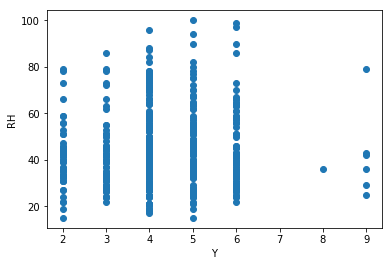

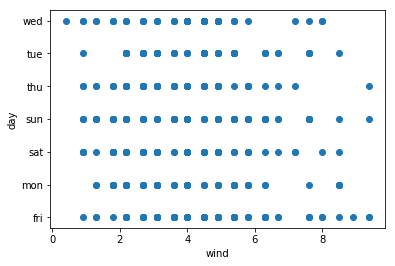

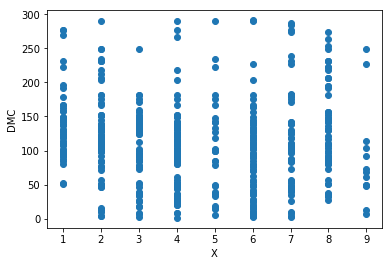

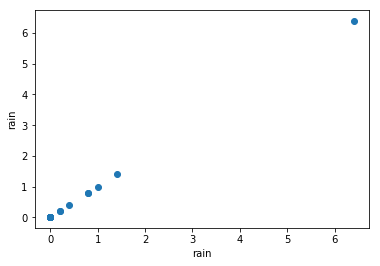

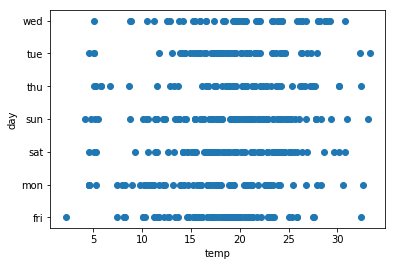

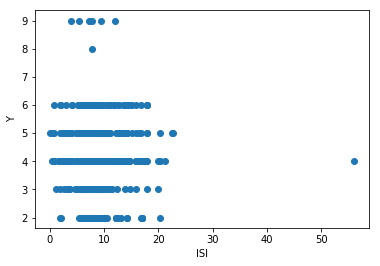

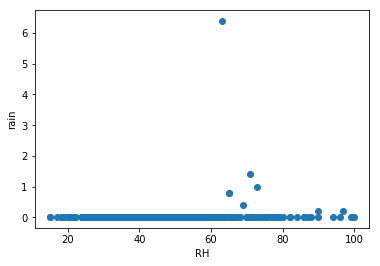

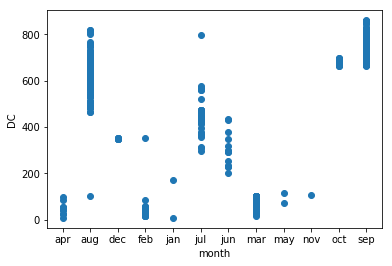

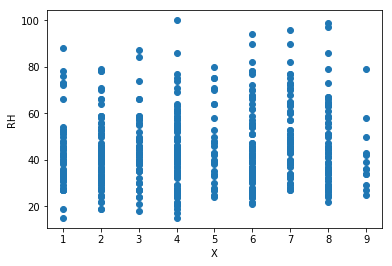

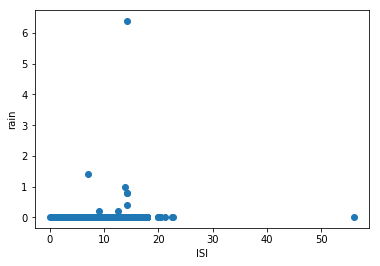

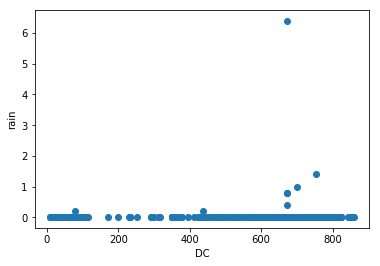

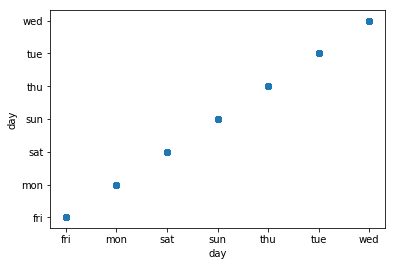

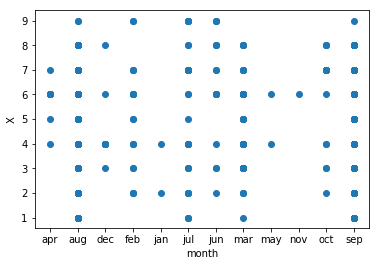

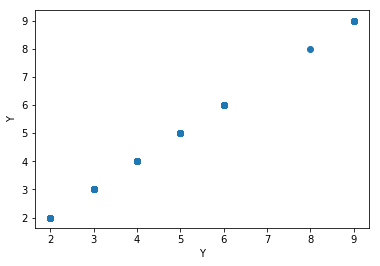

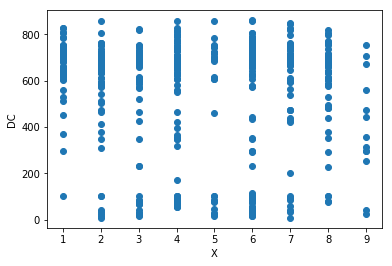

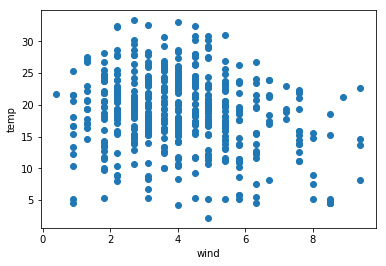

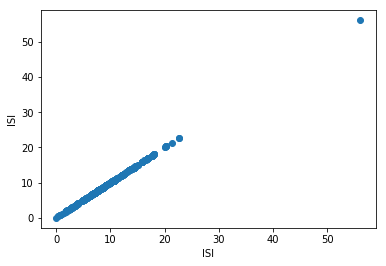

In [77]:
p=["X","Y","month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]

# print("X: ",x,"Y: ",y)
for i in range(0,17):
    x = random.randint(0,11)
    y =  random.randint(0,11)
    plt.scatter(fl[p[x]],fl[p[y]])
    plt.xlabel(p[x])
    plt.ylabel(p[y])
    plt.show()
#     print(p[i])

#### (b)  v. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.


In [5]:
fl.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### 2(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks? 

In [48]:
b=["X","Y","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]

#X= fl[b]
X=fl[b]

#X.head()
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(517, 10)


In [99]:
y=fl['area']
#y.head()

print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(517,)


In [100]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(387, 1)
(130, 1)
(387,)
(130,)


8.64446649185
[ 0.78923934]


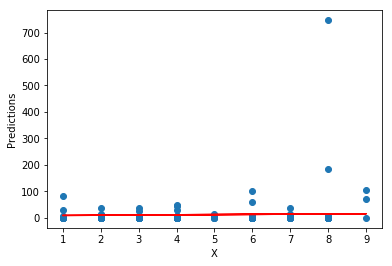

8.64446649185
[ 0.78923934]


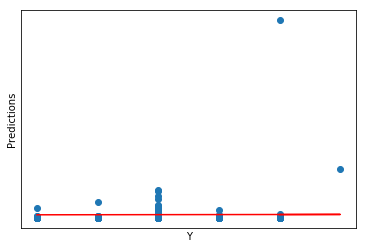

8.64446649185
[ 0.78923934]


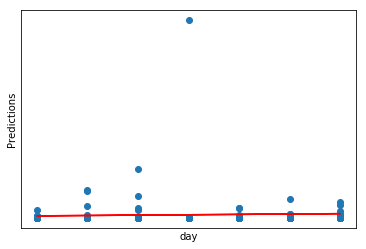

8.64446649185
[ 0.78923934]


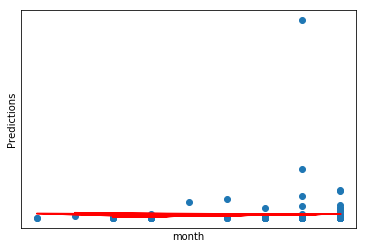

8.64446649185
[ 0.78923934]


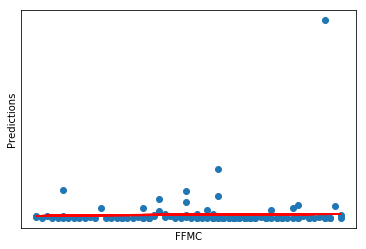

8.64446649185
[ 0.78923934]


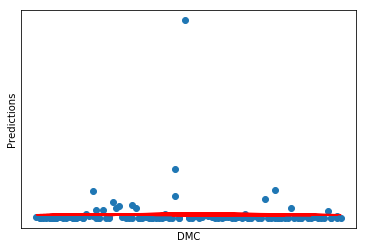

8.64446649185
[ 0.78923934]


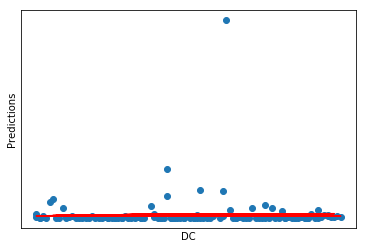

8.64446649185
[ 0.78923934]


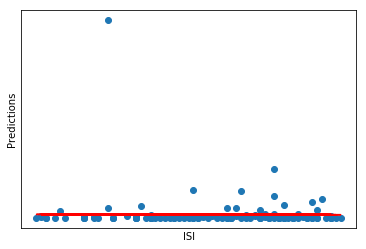

8.64446649185
[ 0.78923934]


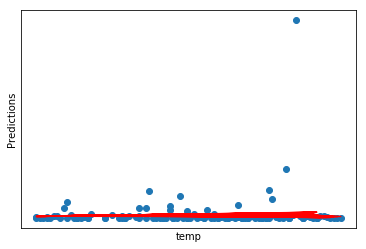

8.64446649185
[ 0.78923934]


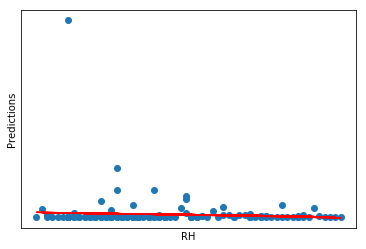

8.64446649185
[ 0.78923934]


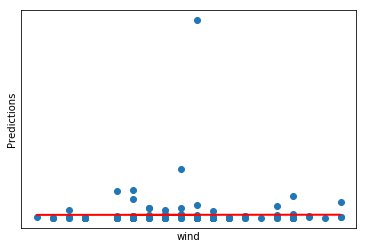

8.64446649185
[ 0.78923934]


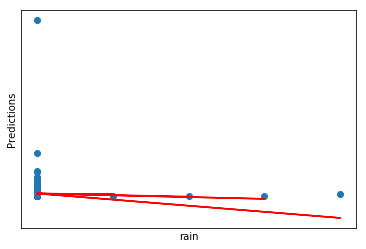

TypeError: must be str, not int

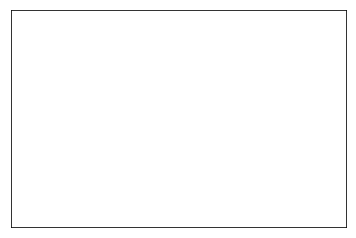

In [118]:
fl = pd.read_csv('forestfires.csv')
fl.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
fl.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)

b = ["X","Y","day","month","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]
i=0
fig = plt.figure()
for i in b:
    X=fl[[i]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
    lm = LinearRegression().fit(X_train,Y_train)
    print(linreg.intercept_)
    print(linreg.coef_)
    predictions = lm.predict(X_test)
    #g1 = fig.add_subplot(5,2,i)
    plt.scatter(X_test,y_test)
    plt.plot(X_test,predictions, "Red")
    plt.xlabel(i)
    plt.ylabel("Predictions")
    plt.show()
    plt.xticks(())
    plt.yticks(())
i+=1

In [134]:
print("Score:", model.score(X_test, y_test))

Score: 0.0015604258504


#### Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?
 

# Multiple Regression

In [11]:
b=["X","Y","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]

#X= fl[b]
X=fl[b]

#X.head()
print(type(X))
print(X.shape)
y=fl[['area']]
#y.head()
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(517, 10)
<class 'pandas.core.frame.DataFrame'>
(517, 1)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_pred=regressor.predict(X_test)
print(y_pred)

[[ 11.33715094]
 [  6.77855207]
 [ 13.722784  ]
 [ 16.92916718]
 [ 13.34456007]
 [ 15.094744  ]
 [ 15.52010417]
 [  4.20054797]
 [ 18.95433927]
 [  1.16891671]
 [  8.04326627]
 [  7.71318808]
 [ 13.05245434]
 [  6.32941371]
 [ 18.26697286]
 [ -4.87925261]
 [ 14.1494953 ]
 [ 13.26856185]
 [  2.5839473 ]
 [  9.47017409]
 [ -0.08729501]
 [  9.67257218]
 [  9.81331279]
 [  1.97925723]
 [ 19.45088013]
 [  3.64887096]
 [ 12.1366731 ]
 [ 14.3177945 ]
 [ 16.4543041 ]
 [  4.80948279]
 [  6.31527072]
 [ 16.88123171]
 [  4.84257442]
 [ 24.3495088 ]
 [ 27.08861534]
 [ 21.10900535]
 [  6.26998578]
 [  4.85126473]
 [ 17.90674437]
 [ 25.46958177]
 [  0.58745104]
 [  3.30761924]
 [  8.4626299 ]
 [  5.967789  ]
 [  6.73245257]
 [ 14.7601841 ]
 [ 37.38588286]
 [  2.55237294]
 [  2.02446895]
 [  9.74195412]
 [ 15.22542221]
 [  5.7085761 ]
 [  7.74403529]
 [ 13.66875601]
 [  4.07310573]
 [  3.4965275 ]
 [  5.98178077]
 [  9.21690327]
 [  4.20689443]
 [ 10.73537474]
 [  7.84370445]
 [ 10.4857206 ]
 [ 18.05

# using OLS

In [19]:
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [23]:
fl

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [33]:
results = sm.ols(formula='Y~X+Y+FFMC+DMC+DC+ISI+temp+RH+wind+rain',data =fl).fit()

In [64]:
from statsmodels.datasets.longley import load
df_x = pd.DataFrame(load().exog,columns=["X","Y","FFMC","DMC","DC","ISI"])
Y_ols_pred=results.predict(df_x)
Y_ols_pred
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.061e+28
Date:                Fri, 02 Feb 2018   Prob (F-statistic):               0.00
Time:                        23:56:37   Log-Likelihood:                 15217.
No. Observations:                 517   AIC:                        -3.042e+04
Df Residuals:                     510   BIC:                        -3.039e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.525e-13    3.4e-14     -4.492      0.000   -2.19e-13   -8.58e-14
X          -1.561e-16   9.11e-16     -0.171      0.864   -1.95e-15    1.63e-15
Y              1.0000   1.73e-15   5.79e+14      0.000       1.000       1.000
FFMC        1.645e-15   3.95e-16      4.158      0.000    8.68e-16    2.42e-15
DMC         2.237e-16   3.94e-17      5.684      0.000    1.46e-16    3.01e-16
DC          2.196e-17    9.9e-18      2.217      0.027     2.5e-18    4.14e-17
ISI        -4.163e-17   4.62e-16     -0.090      0.928    -9.5e-16    8.67e-16
==============================================================================
Omnibus:                      103.178   Durbin-Watson:                   0.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.166
Skew:                           0.978   Prob(JB):                     3.95e-61
Kurtosis:                       6.015   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

######  (e) How do your results from 2c compare to your results from 2d? Create a plot displaying the univariate regression coefficients from 2c on the x-axis, and the multiple regression coefficients from 2d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

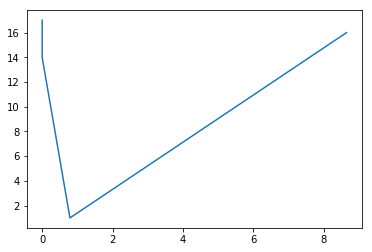

In [68]:
p=[8.64446649185, 0.78923934,0,0,0]
q=[16,1,14,16,17]
fig,a = plt.subplots()
a.plot(p,q)

#### (f) Is there evidence of nonlinear association between any of the predictors and theresponse? To answer this question, for each predictor X, fit a model of the form Y1 = β0 + β1X + β2X 2 + β3X3 + error

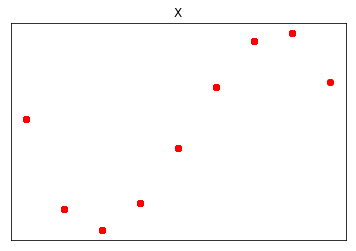

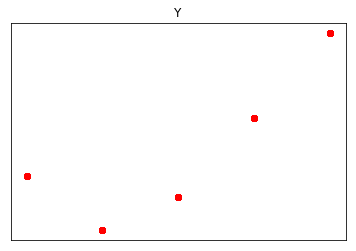

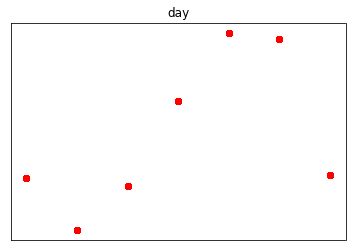

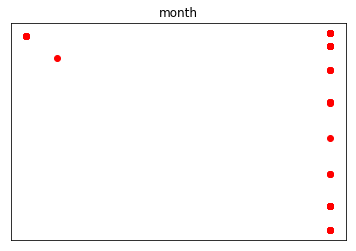

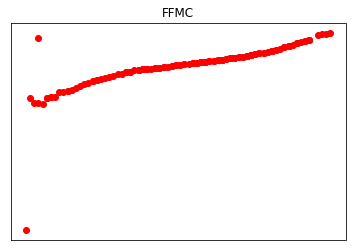

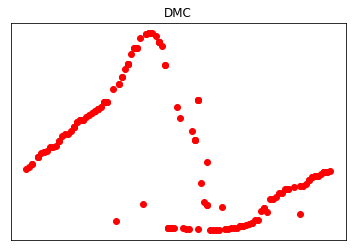

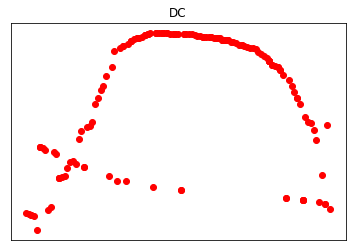

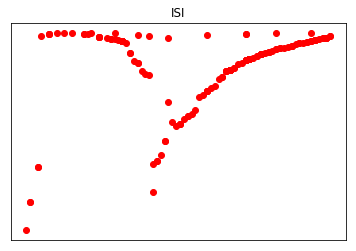

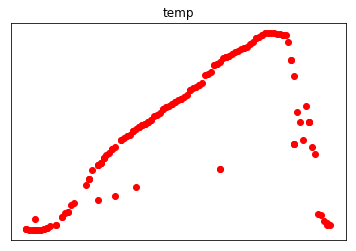

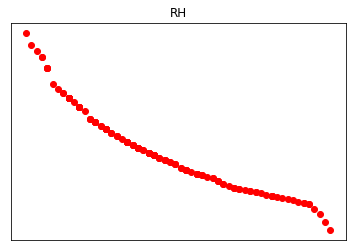

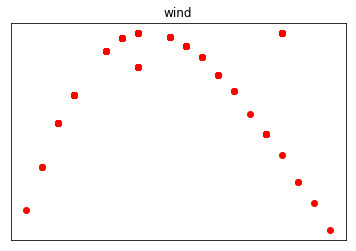

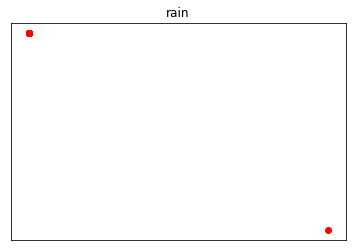

TypeError: must be str, not int

In [162]:
fl = pd.read_csv('forestfires.csv')
fl.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
fl.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)
b = ["X","Y","day","month","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]
y=fl[["area"]]
for x in b:
        traind,testd,trainL,testL= train_test_split(fl[[x]],y,test_size=0.3)
        lm = make_pipeline(PolynomialFeatures(3),Ridge())
        lm.fit(np.array(traind),trainL)
        sy = lm.predict(testd)
        plt.scatter(testd,sy,color='red')
        plt.title(x)
        plt.xticks(())
        plt.yticks(())
        plt.show()
       
x+=1

#### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant 

In [132]:
fl = pd.read_csv('forestfires.csv')
columns = fl.columns.tolist()
interaction = ''
for m,mContent in enumerate(columns[0:12]):
    for jContent in columns[m+1:12]:
        interaction = interaction + mContent + '*' + jContent + '+'
interaction = interaction[:-1]
results = smf.ols('area ~ %s'%interaction, data=fl).fit()
print(results.summary())


C:\Users\palla\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\palla\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\palla\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\palla\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                 -0.290
Method:                 Least Squares   F-statistic:                    0.4815
Date:                Sat, 03 Feb 2018   Prob (F-statistic):               1.00
Time:                        14:53:28   Log-Likelihood:                -2799.2
No. Observations:                 517   AIC:                             6048.
Df Residuals:                     292   BIC:                             7004.
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5

#### (h) Can you improve your model using possible interaction terms or nonlinear associations and between the predictors and response? Train the model on a randomly selected 70% subset of the data and test it on the remaining points and report your train and test results.


In [139]:
fl = pd.read_csv('forestfires.csv')
fl.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
fl.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)
y=fl["area"]

b= ["X","Y","day","month","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]
for x in b: 
    trainData,testData,trainLabel,testLabel= train_test_split(df[[x]],output,test_size=0.3)

    lm = linear_model.LinearRegression()
    lm.fit(trainData,trainLabel)
    p = lm.predict(testData)
    lmse = mean_squared_error(testLabel,p)
    Lr2 = r2_score(testLabel,prediction)
    print("Linear mse of %s is %f " %(x,lmse))
    print("Linear R2 of %s is %f " %(x, Lr2))

    m = make_pipeline(PolynomialFeatures(3),Ridge())
    m.fit(trainData,trainLabel)
    Polp = m.predict(testData)
    PolMse = mean_squared_error(testLabel,Polp)
    PolR2 = r2_score(testLabel,Polp)
    print("Non Linear mse of %s is %f " %(x, PolMse))
    print("Non Linear R2 %s is %f " %(x, PolR2))

Linear mse of X is 2.225816 
Linear R2 of X is -0.182797 
Non Linear mse of X is 2.231756 
Non Linear R2 X is -0.014964 
Linear mse of Y is 1.803021 
Linear R2 of Y is -0.555067 
Non Linear mse of Y is 1.850308 
Non Linear R2 Y is -0.038263 
Linear mse of day is 2.192633 
Linear R2 of day is -0.242434 
Non Linear mse of day is 2.201544 
Non Linear R2 day is -0.006813 
Linear mse of month is 1.692038 
Linear R2 of month is -0.270257 
Non Linear mse of month is 1.674261 
Non Linear R2 month is 0.024370 
Linear mse of FFMC is 1.807241 
Linear R2 of FFMC is -0.199945 
Non Linear mse of FFMC is 1.838211 
Non Linear R2 FFMC is -0.015294 
Linear mse of DMC is 1.811862 
Linear R2 of DMC is -0.202786 
Non Linear mse of DMC is 1.811791 
Non Linear R2 DMC is 0.005655 
Linear mse of DC is 2.006857 
Linear R2 of DC is -0.188083 
Non Linear mse of DC is 2.034429 
Non Linear R2 DC is -0.038005 
Linear mse of ISI is 2.262757 
Linear R2 of ISI is -0.306447 
Non Linear mse of ISI is 2.374485 
Non Linear

###### (i) KNN Regression: Note that for this problem, we have a mixture of categorical and quantitative predictors. There is not a unique way to define a distance metric in such a situation. Describe your findings and heuristics. Can your metric be specific to this problem? Use a reasonable distance metric to answer the following questions:
i. Use the first 4 predictors to perform k-nearest neighbor regression for this
dataset. Find the value of k that gives you the best fit. Plot the train and
test errors in terms of 1/k.

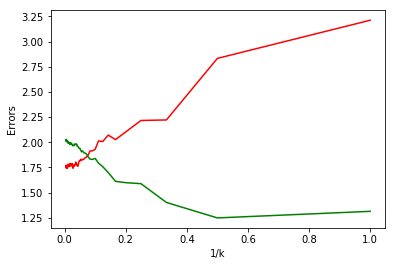

In [193]:
fl = pd.read_csv('forestfires.csv')
fl.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
fl.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)
b = np.column_stack((fl["X"],fl["Y"],fl["month"],fl["day"]))
Y = np.log(1 + df["area"])
testErrors=[]
trainErrors=[]
ki=[]
trainData,testData,trainLabel,testLabel= train_test_split(b,Y,test_size=0.3)

for k in range(1,250):
    neigh = neighbors.KNeighborsRegressor(n_neighbors=k)
    y = neigh.fit(trainData,trainLabel)
    predict = neigh.predict(testData)
    error = mean_squared_error(testLabel,predict)
    testErrors.append(error)
    predictTrain = neigh.predict(trainData)
    trainError = mean_squared_error(trainLabel,predictTrain)
    trainErrors.append(trainError)
    ki.append(float(1)/k)

    
plt.plot(ki,testErrors,color='red',label='Test Error')
plt.plot(ki,trainErrors,color='green', label='Train Error')
plt.xlabel("1/k")
plt.ylabel("Errors")
plt.show()

#### ii. Use the last 4 predictors to perform k-nearest neighbor regression for this dataset. Find the value of k that gives you the best fit. Plot the train and test errors in terms of 1/k. 

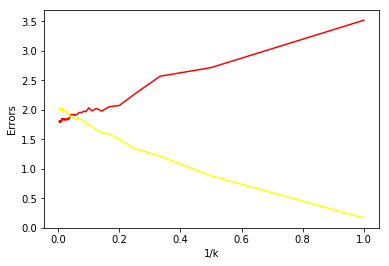

In [194]:
fl = pd.read_csv('forestfires.csv')
fl.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
fl.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)
b = np.column_stack((fl["temp"],fl["RH"],fl["wind"],fl["rain"]))
Y = np.log(1 + df["area"])
testErrors=[]
trainErrors=[]
ki=[]
trainData,testData,trainLabel,testLabel= train_test_split(b,Y,test_size=0.3)

for k in range(1,250):
    neigh = neighbors.KNeighborsRegressor(n_neighbors=k)
    y = neigh.fit(trainData,trainLabel)
    predict = neigh.predict(testData)
    error = mean_squared_error(testLabel,predict)
    testErrors.append(error)
    predictTrain = neigh.predict(trainData)
    trainError = mean_squared_error(trainLabel,predictTrain)
    trainErrors.append(trainError)
    ki.append(float(1)/k)

    
plt.plot(ki,testErrors,color='red',label='Test Error')
plt.plot(ki,trainErrors,color='yellow', label='Train Error')
plt.xlabel("1/k")
plt.ylabel("Errors")
plt.show()

#### iii. Use predictors 1,2, 9, 10, 11 to perform k-nearest neighbor regression for this dataset. Find the value of k that gives you the best fit. Plot the train and test errors in terms of 1/k.

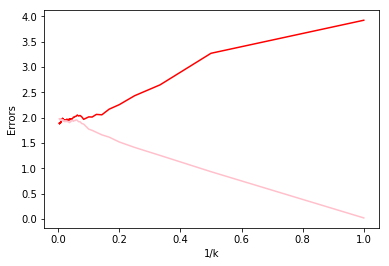

In [195]:
fl = pd.read_csv('forestfires.csv')
fl.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
fl.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)
b = np.column_stack((fl["X"],fl["Y"],fl["wind"],fl["RH"],fl["temp"]))
Y = np.log(1 + df["area"])
testErrors=[]
trainErrors=[]
ki=[]
trainData,testData,trainLabel,testLabel= train_test_split(b,Y,test_size=0.3)

for k in range(1,250):
    neigh = neighbors.KNeighborsRegressor(n_neighbors=k)
    y = neigh.fit(trainData,trainLabel)
    predict = neigh.predict(testData)
    error = mean_squared_error(testLabel,predict)
    testErrors.append(error)
    predictTrain = neigh.predict(trainData)
    trainError = mean_squared_error(trainLabel,predictTrain)
    trainErrors.append(trainError)
    ki.append(float(1)/k)

    
plt.plot(ki,testErrors,color='red',label='Test Error')
plt.plot(ki,trainErrors,color='pink', label='Train Error')
plt.xlabel("1/k")
plt.ylabel("Errors")
plt.show()

#### (j) Compare the results of KNN Regression with linear regression and provide your analysis
In my opinion KNN has a better error rate(least).
